In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs 
from PIL import Image
from tqdm import tqdm,trange

# 파일 데이터 목록 크롤링 하기 

In [2]:
url = 'https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=국립암센터&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='

# 마지막 페이지 찾기 

In [3]:
response = requests.get(url)
response # 응답 요청 확인하기 

<Response [200]>

In [4]:
content = response.text # html 태그 담기 
html = bs(content) #Beautiful Soup 이용하여 정렬 

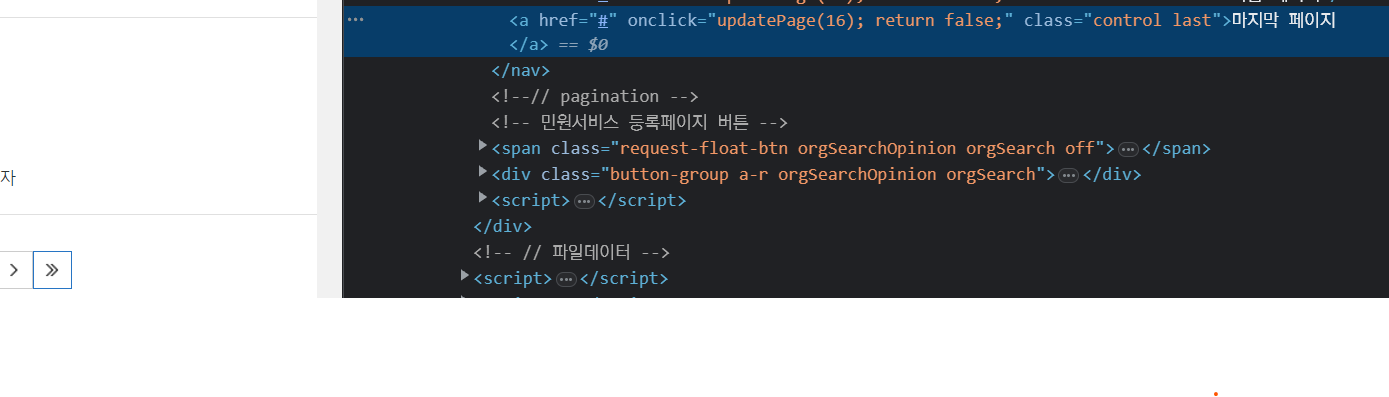

In [5]:
Image.open("C:/Users/whileduck/Desktop/마지막 페이지.png") 

* 마지막 페이지는 Class 가 control last 인 태그 안에 존재한다.

In [6]:
print(html.find_all(class_ = 'control last')[0]) # onclick에서 리스트 슬라이싱을 이용해 마지막 페이지 번호를 가져오자 

<a class="control last" href="#" onclick="updatePage(16); return false;">마지막 페이지</a>


In [7]:
last_page = int(html.find_all(class_ = 'control last')[0]['onclick'].split(';')[0][-3:-1])
last_page

16

# 데이터 별 제목과 URL이 있는 태그를 가져오자 

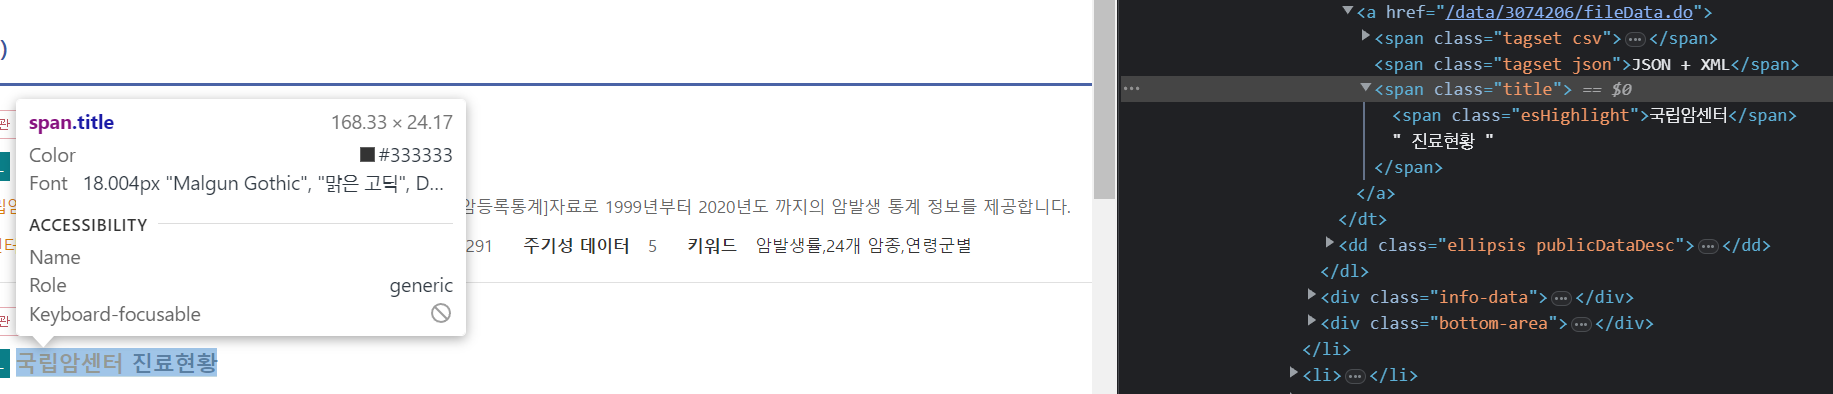

In [8]:
Image.open("C:/Users/whileduck/Desktop/제목과 URL.png") 

* 제목은 class 가 title 인 곳에 위치하고 해당 title 위에 url 링크가 존재한다.

* 제목 가져오기 

In [9]:
titles = html.select('dt > a > span.title')

title_list = []

for title in titles:
    
    title_list.append(title.text.strip())
    
    
title_list

['국립암센터_암발생 통계 정보',
 '국립암센터 진료현황',
 '국립암센터_24개종 암발생률',
 '국립암센터_24개종 암 유병률',
 '국립암센터 호스피스완화의료 전문기관 리스트',
 '국립암센터_흡연 및 금연 정보',
 '국립암센터_24개종 암 상대생존율',
 '국립암센터_국가암정보센터 cancer_data',
 '국립암센터_국가암정보센터_개방데이터_cancer',
 '국립암센터_폐암 레지스트리 메타정보']

* URL 주소 가져오기

In [10]:
base = 'https://www.data.go.kr'

hrefs = html.select('dt > a ')

href_list = []

for href in hrefs:
    
    href_list.append(base + href['href'])
    
    
href_list

['https://www.data.go.kr/data/3039563/fileData.do',
 'https://www.data.go.kr/data/3074206/fileData.do',
 'https://www.data.go.kr/data/15009644/fileData.do',
 'https://www.data.go.kr/data/15009664/fileData.do',
 'https://www.data.go.kr/data/15018868/fileData.do',
 'https://www.data.go.kr/data/3039566/fileData.do',
 'https://www.data.go.kr/data/15009667/fileData.do',
 'https://www.data.go.kr/data/15049624/fileData.do',
 'https://www.data.go.kr/data/15049621/fileData.do',
 'https://www.data.go.kr/data/15048700/fileData.do']

# 파일 데이터 목록 크롤링 하기 

In [11]:
def get_last_page(url):
    
    response = requests.get(url)
    
    content = response.text
    
    html = bs(content)
    
    last_page = int(html.find_all(class_ = 'control last')[0]['onclick'].split(';')[0][-3:-1])
    
    return last_page
    

In [12]:
def get_title_and_href(url):
    
    base = 'https://www.data.go.kr'
    title_list = []
    href_list = []
    
    response = requests.get(url)
    
    content = response.text
    html = bs(content)
    
    titles = html.select('dt > a > span.title')
    hrefs = html.select('dt > a ')    

    for title in titles:
        
        title_list.append(title.text.strip()) 
        
    
    for href in hrefs:
        
        href_list.append(base + href['href'])     
        
        
    return title_list,href_list    

In [15]:
last_page = get_last_page(url)

title_list = []
href_list = []


for page_no in trange(1,last_page+1):
    
    url = f'https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=국립암센터&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage={page_no}&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='

    title,href= get_title_and_href(url)
    
    title_list.append(title)
    href_list.append(href) 
    
title_list = sum(title_list,[]) # 리스트 내부 담긴 리스트들 모두 합쳐주기 
href_list = sum(href_list,[])

100%|██████████| 16/16 [00:10<00:00,  1.58it/s]


In [16]:
file_data = pd.DataFrame({'제목':title_list,
                          'URL':href_list}).sort_values(by = '제목').reset_index(drop = True)

file_data

,제목,URL
0,국립암센터 진료현황,https://www.data.go.kr/data/3074206/fileData.do
1,국립암센터 호스피스완화의료 전문기관 리스트,https://www.data.go.kr/data/15018868/fileData.do
2,국립암센터 호스피스완화의료 전문인력 표준교육,https://www.data.go.kr/data/15018869/fileData.do
3,국립암센터_24개종 암 상대생존율,https://www.data.go.kr/data/15009667/fileData.do
4,국립암센터_24개종 암 유병률,https://www.data.go.kr/data/15009664/fileData.do
...,...,...
146,국립암센터_폐암 레지스트리 메타정보,https://www.data.go.kr/data/15048700/fileData.do
147,국립암센터_호스피스완화의료질평가시스템_기관 정보,https://www.data.go.kr/data/15039833/fileData.do
148,국립암센터_호스피스완화의료질평가시스템_설문 데이터,https://www.data.go.kr/data/15039832/fileData.do
149,국립암센터_호스피스완화의료질평가시스템_시스템 운영 정보,https://www.data.go.kr/data/15039831/fileData.do


In [17]:
file_data.to_csv('국립암센터_파일데이터.csv',index = False)

# 오픈 API 크롤링 하기 

In [18]:
url = 'https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=API&keyword=%EA%B5%AD%EB%A6%BD%EC%95%94%EC%84%BC%ED%84%B0&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='

last_page = get_last_page(url)

title_list = []
href_list = []


for page_no in trange(1,last_page+1):
    
    url = f'https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=API&keyword=%EA%B5%AD%EB%A6%BD%EC%95%94%EC%84%BC%ED%84%B0&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage={page_no}&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='
    
    
    title,href= get_title_and_href(url)
    
    title_list.append(title)
    href_list.append(href) 
    
title_list = sum(title_list,[]) # 리스트 내부 담긴 리스트들 모두 합쳐주기 
href_list = sum(href_list,[])

100%|██████████| 19/19 [00:11<00:00,  1.63it/s]


In [19]:
API_data = pd.DataFrame({'제목':title_list,
              'URL':href_list}).sort_values(by = '제목').reset_index(drop = True)

API_data

,제목,URL
0,국립암센터_간암 병기 조사 정보제공 서비스1,https://www.data.go.kr/data/15059516/openapi.do
1,국립암센터_간암_라이브러리 _면역병리_종류별,https://www.data.go.kr/data/15096184/openapi.do
2,국립암센터_간암_라이브러리 _세부진단_종류별,https://www.data.go.kr/data/15096179/openapi.do
3,국립암센터_간암_라이브러리 _수술_종류별,https://www.data.go.kr/data/15096187/openapi.do
4,국립암센터_간암_라이브러리 _시술검사_종류별,https://www.data.go.kr/data/15096185/openapi.do
...,...,...
185,국립암센터_폐암 라이브러리 환자 직업,https://www.data.go.kr/data/15077038/openapi.do
186,국립암센터_폐암 라이브러리 환자 현재 흡연 여부,https://www.data.go.kr/data/15077043/openapi.do
187,국립암센터_폐암 라이브러리 환자수,https://www.data.go.kr/data/15077030/openapi.do
188,국립암센터_폐암 레지스트리 메타 정보제공 서비스,https://www.data.go.kr/data/15057378/openapi.do


In [20]:
API_data.to_csv('국립암센터_API데이터목록.csv',index = False)